# Exploring and Analyzing Paris trees data

Taken from https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+2+Participez+%C3%A0+un+concours+sur+la+Smart+City/p2-arbres-fr.csv, coming from https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=12,48.85984,2.31341&basemap=jawg.streets

## 1) Opening csv file

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) # don't want scientific notation. Floats are enough

csv_path = "./p2-trees-fr.csv"
df = pd.read_csv(csv_path, sep=';')

## 2) Naive Analysis

### Use pandas basic methods

In [2]:
import sys
print('Size in MB:')
sys.getsizeof(df)/(10**6)

Size in MB:


131.216112

In [3]:
df.info() # display count of columns, lines and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [4]:
df.head(2) # display 2 first lines

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.00,48.86,2.32
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.86,2.32


In [5]:
df.describe()# general statistics only on number types variables (int and floats)

# problems:
## 0 as min value for circumference, height
## > 250000 cm as circumference, > 800000 m as height

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.00,0.00,200137.00,200137.00,137039.00,200137.00,200137.00
mean,387202.68,NaN,83.38,13.11,0.00,48.85,2.35
std,545603.24,NaN,673.19,1971.22,0.04,0.03,0.05
min,99874.00,NaN,0.00,0.00,0.00,48.74,2.21
25%,155927.00,NaN,30.00,5.00,0.00,48.84,2.31
50%,221078.00,NaN,70.00,8.00,0.00,48.85,2.35
75%,274102.00,NaN,115.00,12.00,0.00,48.88,2.39
max,2024745.00,NaN,250255.00,881818.00,1.00,48.91,2.47


In [6]:
from data_analysis_functions import plot_univariate_variable_analysis

In [10]:
quantitative_variables = ['circonference_cm','hauteur_m']

### Looking for data anomalies

#### Outliers

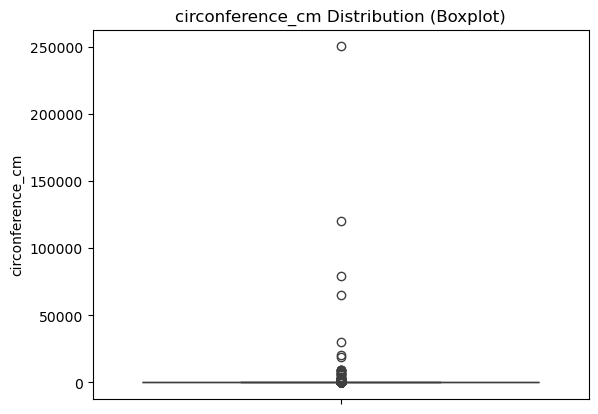

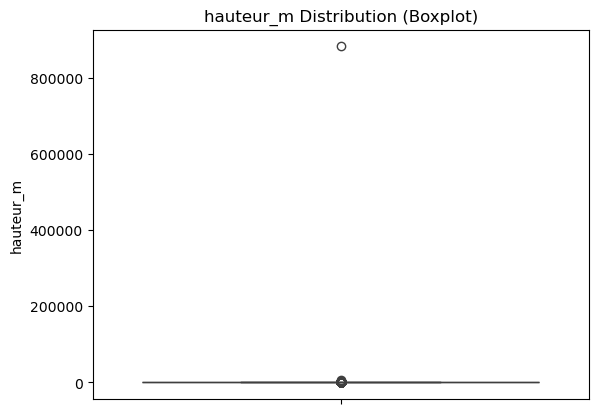

In [11]:
# Boxplots in order to briefly find outliers
for variable in quantitative_variables:
    plot_univariate_variable_analysis(df, variable, 'boxplot')

It seems that there are many outliers on data

#### NaN

In [21]:
import missingno as msno
import numpy as np

In [22]:
# number of 'nan' for each column
column_nb_of_nans = np.array([], dtype='int')
for column in df.columns:
    where_nan = df[df[column].isna()]
    column_nb_of_nans = np.concatenate((column_nb_of_nans,[len(where_nan)]))
column_nb_of_nans

array([     0,      0,      1,      0, 169235, 200137,      0,      0,
         1497,     16,   1752, 163360,      0,      0,  67205,  63098,
            0,      0])

In [23]:
# dataframe with number of nans per column only when one nan or more
where_nans = np.where(column_nb_of_nans>0)
columns_with_nans_df = pd.DataFrame([column_nb_of_nans[where_nans]], columns = df.columns[where_nans])
print('Number of nan for each variable that contains minimum 1 occurrence:')
columns_with_nans_df

Number of nan for each variable that contains minimum 1 occurrence:


,domanialite,complement_addresse,numero,libelle_francais,genre,espece,variete,stade_developpement,remarquable
0,1,169235,200137,1497,16,1752,163360,67205,63098


<Axes: >

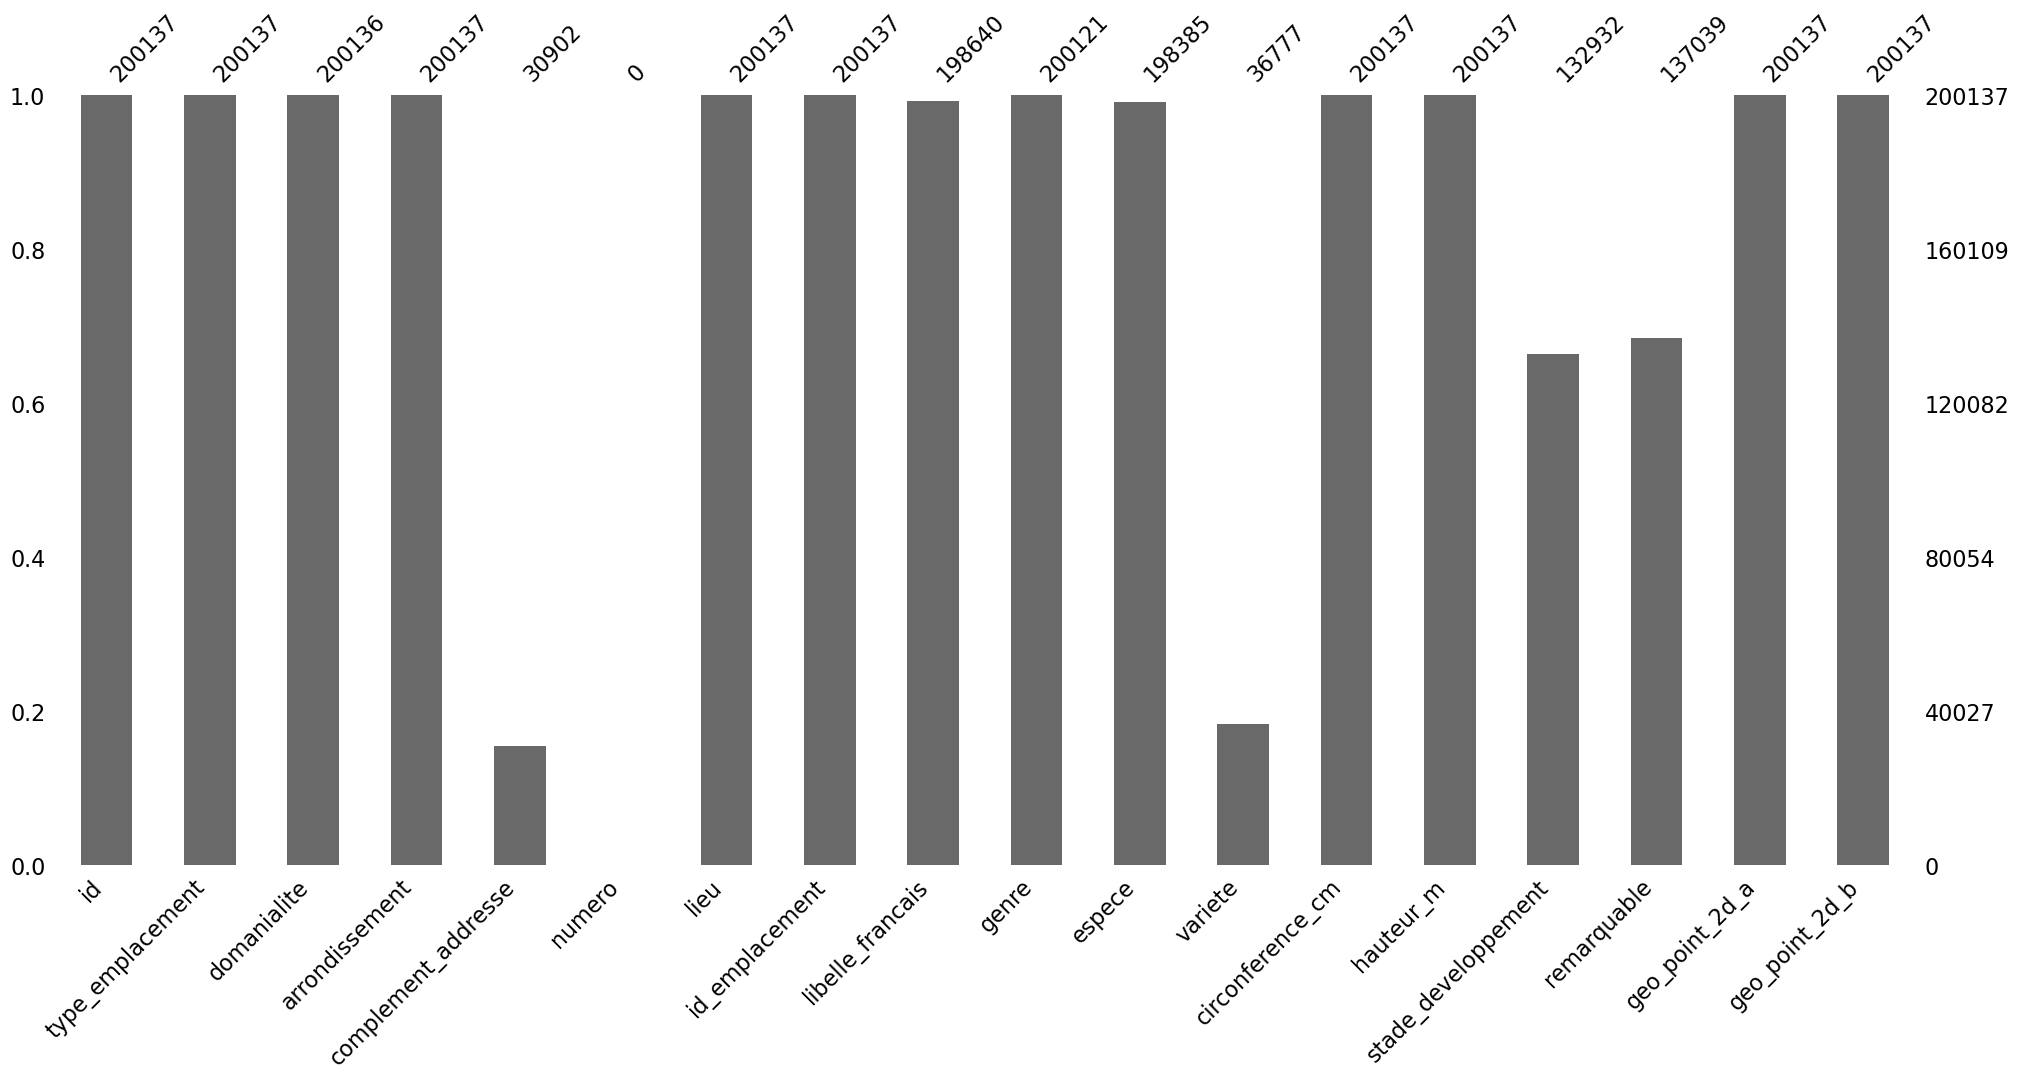

In [17]:
# stade_developpement and remarquable are missing around 30% values. Variete is missing 80 percent values
msno.bar(df)

<Axes: >

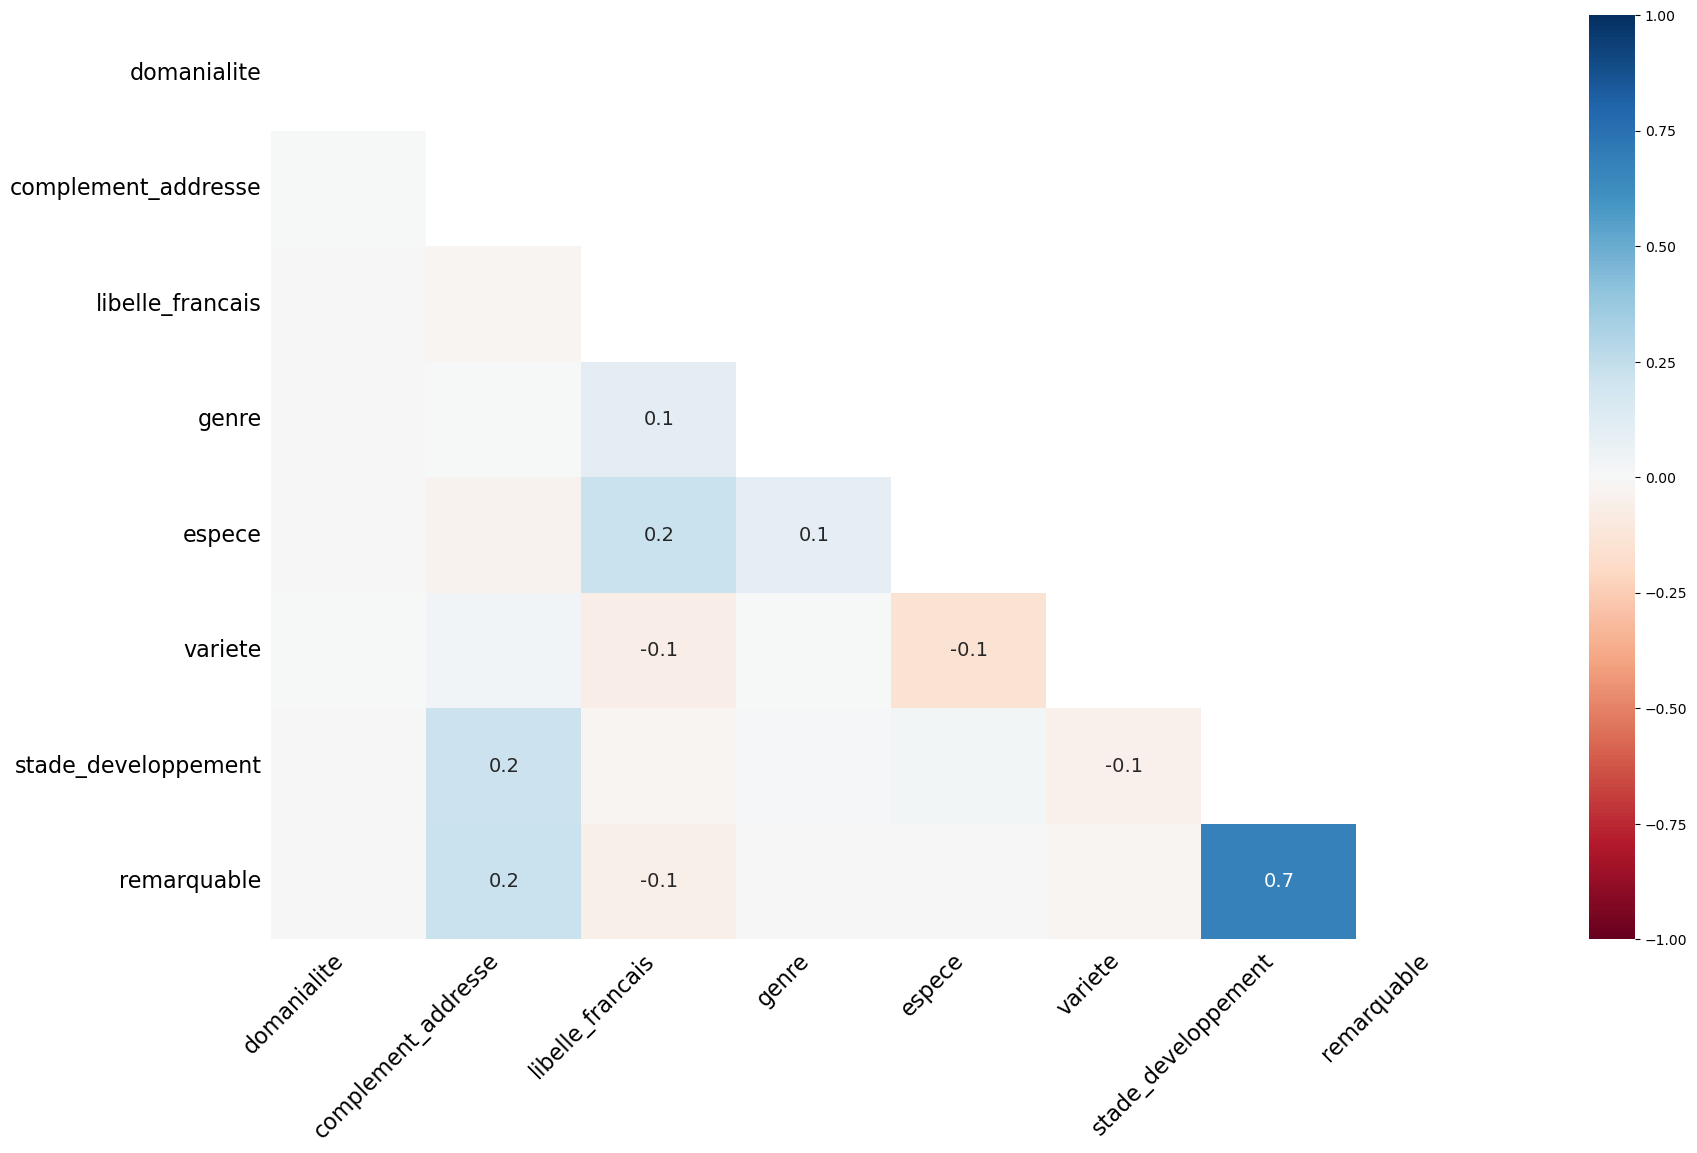

In [20]:
# missing values correlation between stade_developpement and remarquable. Look at which trees they are
msno.heatmap(df)

## 3) Cleaning anomalies

In [143]:
df_refined = df.copy()

### Outliers (min and max)

##### Max

Height :

In [144]:
# based on the tallest tree height : https://en.wikipedia.org/wiki/Hyperion_(tree)
max_height = 116 # in meters

In [145]:
max_height_outlier_df = df_refined[(df_refined['hauteur_m'] > max_height)]

In [146]:
print('height outliers trees ('+ str(len(max_height_outlier_df)) + ' occurrencies):')
max_height_outlier_df


height outliers trees (87 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
5392,106800,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS,A0120683,Tilleul,Tilia,n. sp.,NaN,100,1510,A,0.00,48.86,2.30
6473,107951,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS / C01 / ALLEE LEON BOU...,A00202003,Platane,Platanus,x hispanica,NaN,112,117,A,0.00,48.86,2.29
12536,115062,Arbre,Jardin,PARIS 16E ARRDT,11 à 27,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,10303,Erable,Acer,n. sp.,NaN,47,255,J,0.00,48.87,2.29
15373,118412,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,SQUARE DE L'ABBE ESQUERRE,17,Paulownia,Paulownia,tomentosa,NaN,145,810,A,0.00,48.85,2.31
24099,128185,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,SQUARE ANDRE ULMANN,27,Platane,Platanus,x hispanica,NaN,130,125,A,0.00,48.89,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187873,2008880,Arbre,DJS,PARIS 13E ARRDT,NaN,NaN,STADE CHARLETTY / 99 BOULEVARD KELLERMANN,91,Micocoulier,Celtis,australis,NaN,10,120,JA,0.00,48.82,2.35
187874,2008881,Arbre,DJS,PARIS 13E ARRDT,NaN,NaN,STADE CHARLETTY / 99 BOULEVARD KELLERMANN,92,Micocoulier,Celtis,australis,NaN,10,120,JA,0.00,48.82,2.35
189053,2011417,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,180088,Pin,Pinus,mugo,NaN,60,150,JA,0.00,48.83,2.44
189441,2011863,Arbre,DFPE,PARIS 16E ARRDT,NaN,NaN,ERLANGER (9-11) CRECHE,48970005,Marronnier,Aesculus,hippocastanum,Baumannii',8,157,NaN,0.00,48.85,2.26


In [147]:
max_height_outlier_df.value_counts('hauteur_m')

hauteur_m
120       7
155       5
118       5
125       4
810       4
117       3
205       3
1515      3
150       3
510       2
160       2
610       2
1510      2
1512      1
1511      1
5155      1
618       1
2525      1
714       1
720       1
2015      1
815       1
818       1
1815      1
1010      1
1113      1
1211      1
1216      1
1610      1
1514      1
615       1
260       1
608       1
159       1
122       1
128       1
129       1
130       1
138       1
148       1
154       1
156       1
157       1
170       1
512       1
180       1
190       1
204       1
216       1
218       1
219       1
220       1
255       1
327       1
881818    1
Name: count, dtype: int64

In [148]:
# remove outlier
df_refined = df_refined[df_refined['hauteur_m']!=881818]

In [149]:
# need in order to divide by 100 the too high heights
df_refined['hauteur_m'] = df_refined['hauteur_m'].astype(float)

In [150]:
# Too high remaining heights may have been measured in cms
df_refined.loc[df_refined['hauteur_m'] > max_height, 'hauteur_m'] = df_refined.loc[df_refined['hauteur_m'] > max_height, 'hauteur_m']/100

Girth :

In [151]:
# based on the biggest tree girth (circumference) : https://www.guinnessworldrecords.com/world-records/living-tree-with-greatest-girth
max_girth = 36 # in meters

In [152]:
max_girth_outlier_df = df_refined[(df_refined['circonference_cm']/100 > max_girth)]

In [153]:
print('girth outliers trees ('+ str(len(max_girth_outlier_df)) + ' occurrencies):')
max_girth_outlier_df

girth outliers trees (20 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
71787,190080,Arbre,DASCO,PARIS 20E ARRDT,NaN,NaN,PLAINE (9) ELEM B,11110006,Tilleul,Tilia,tomentosa,NaN,18589,15.00,A,0.00,48.85,2.40
82951,203295,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,RUE D AUBERVILLIERS,301004,Erable,Acer,monspessulanum,NaN,5545,56.00,J,0.00,48.89,2.37
90605,211362,Arbre,Alignement,PARIS 5E ARRDT,34,NaN,BOULEVARD SAINT MARCEL,204025,Cedrele,Toona,sinensis,NaN,20130,16.00,A,0.00,48.84,2.36
91256,212024,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,RUE DE CHALON,202005,Micocoulier,Celtis,australis,NaN,30140,10.00,A,0.00,48.85,2.37
97354,218274,Arbre,Alignement,PARIS 7E ARRDT,27,NaN,AVENUE RAPP,501003,Platane,Platanus,occidentalis,NaN,8110,18.00,A,0.00,48.86,2.30
103437,224609,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,BOULEVARD BARBES,1303003,Platane,Platanus,x hispanica,NaN,9035,6.00,J,0.00,48.89,2.35
133546,256868,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,AVENUE JEAN JAURES,1501006,Platane,Platanus,x hispanica,NaN,4090,10.00,A,0.00,48.89,2.39
147235,270997,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,QUAI BRANLY,503005,Paulownia,Paulownia,tomentosa,NaN,9155,15.00,A,0.00,48.86,2.29
147634,271402,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,AVENUE BOSQUET,1202016,Platane,Platanus,occidentalis,NaN,65110,16.00,A,0.00,48.86,2.31
148106,271884,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,AVENUE BOSQUET,501022,Platane,Platanus,occidentalis,NaN,6595,15.00,A,0.00,48.86,2.30


In [154]:
max_girth_outlier_df.value_counts('circonference_cm')

circonference_cm
3630      1
4090      1
120170    1
79120     1
65110     1
30140     1
20130     1
18589     1
9155      1
9095      1
9085      1
9035      1
8110      1
7540      1
6595      1
6125      1
6120      1
6085      1
5545      1
250255    1
Name: count, dtype: int64

In [155]:
max_girth_outlier_df.value_counts('hauteur_m')

hauteur_m
10.00    4
15.00    3
5.00     2
16.00    2
18.00    2
20.00    2
6.00     1
8.15     1
12.00    1
22.00    1
56.00    1
Name: count, dtype: int64

In [156]:
# Report these problematic girths. Remove these outliers
df_refined = df_refined[df_refined['circonference_cm']/100 < max_girth]
## maybe change values to nans

##### Min

Height :

In [158]:
# based on the tallest tree height : https://en.wikipedia.org/wiki/Hyperion_(tree)
min_height = 0 # in meters

In [159]:
min_height_outlier_df = df_refined[(df_refined['hauteur_m'] <= min_height)]

In [164]:
# no negative value : ok
min_height_outlier_df.value_counts('hauteur_m')

hauteur_m
0.00    39219
Name: count, dtype: int64

In [160]:
# Maybe freshly planted trees are 0 meters tall and/or 0 is a default value when not measured
print('height outliers trees ('+ str(len(min_height_outlier_df)) + ' occurrencies):')
min_height_outlier_df

height outliers trees (39219 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0.00,NaN,NaN,48.89,2.32
5,99879,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0036,Arbre à miel,Tetradium,daniellii,NaN,38,0.00,NaN,NaN,48.89,2.32
6,99880,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0035,Arbre à miel,Tetradium,daniellii,NaN,37,0.00,NaN,NaN,48.89,2.32
11,99885,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,20001,Hêtre,Fagus,sylvatica,Atropunicea',30,0.00,NaN,NaN,48.86,2.27
12,99887,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,20003,Micocoulier,Celtis,occidentalis,NaN,205,0.00,NaN,NaN,48.86,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0.00,NaN,0.00,48.82,2.46
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0.00,NaN,0.00,48.82,2.46
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0.00,NaN,0.00,48.82,2.46
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0.00,NaN,0.00,48.82,2.46


In [163]:
# A = Adult, JA = Jeune Adulte, J = Jeune, M = Mature
# Majority has no stade_developpement value. Probably freshly planted grain. Recommend to not ignore these trees. 
# For the others, it may probably be a fill value. I recommend setting the height values as NaN
min_height_outlier_df.value_counts('stade_developpement', dropna=False)

stade_developpement
NaN    36952
A       1191
JA       577
J        474
M         25
Name: count, dtype: int64

In [170]:
# giving NaN value instead of 0 for already existing trees in order to signal missing data
df_refined.loc[(df_refined['hauteur_m'] <= min_height) & (df_refined['stade_developpement'].isin(['A', 'JA', 'J', 'M'])),
                                                          'hauteur_m'] = np.nan
# check 1 or 2 trees tagged as 'A' or 'JA' (or other) to see if these really is a positive height

Girth :

In [176]:
# based on the biggest tree girth (circumference) : https://www.guinnessworldrecords.com/world-records/living-tree-with-greatest-girth
min_girth = 0 # in meters

In [177]:
min_girth_outlier_df = df_refined[df_refined['circonference_cm'] <= min_girth]

In [178]:
# no negative value : ok
min_girth_outlier_df.value_counts('circonference_cm')

circonference_cm
0    25867
Name: count, dtype: int64

In [179]:
# Maybe freshly planted trees have 0 cms girth and/or 0 is a default value when not measured
print('girth outliers trees ('+ str(len(min_girth_outlier_df)) + ' occurrencies):')
min_girth_outlier_df

girth outliers trees (25867 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1778,101922,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,C0400032,Erable,Acer,platanoides,NaN,0,0.00,NaN,NaN,48.88,2.38
2332,102591,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0052,Magnolia,Magnolia,x soulangeana,Heaven Scent',0,0.00,NaN,NaN,48.89,2.32
2333,102592,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0053,Magnolia,Magnolia,x soulangeana,Heaven Scent',0,0.00,NaN,NaN,48.89,2.32
2405,102744,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,SQUARE LEON FRAPIE,2,Platane,Platanus,x hispanica,NaN,0,NaN,JA,0.00,48.87,2.41
2430,102773,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0021,Magnolia,Magnolia,x soulangeana,Sundew',0,0.00,NaN,NaN,48.89,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0.00,NaN,0.00,48.82,2.46
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0.00,NaN,0.00,48.82,2.46
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0.00,NaN,0.00,48.82,2.46
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0.00,NaN,0.00,48.82,2.46


In [185]:
# A = Adult, JA = Jeune Adulte, J = Jeune, M = Mature
# Majority has no stade_developpement value. Probably freshly planted grain. Recommend to not ignore these trees. 
# For the others, it may probably be a fill value. I recommend setting the height values as NaN
min_girth_outlier_df.value_counts('stade_developpement', dropna=False)

stade_developpement
NaN    25586
J        126
A         81
JA        51
M         23
Name: count, dtype: int64

In [186]:
# giving NaN value instead of 0 for already existing trees in order to signal missing data
df_refined.loc[(df_refined['circonference_cm'] <= min_girth) & (df_refined['stade_developpement'].isin(['A', 'JA', 'J', 'M'])),
                                                          'circonference_cm'] = np.nan
# same question as minimum height (see above)

In [196]:
# search if trees 0 meters height trees and 0 cms girth trees are the same
both_zero = ((df_refined['hauteur_m'] <= 0) & (df_refined['circonference_cm'] <= 0)).sum()
print(f'{both_zero} trees are both 0 m tall and 0 cms girth')

height_zero_girth_non_zero = ((df_refined['hauteur_m'] <= 0) & (df_refined['circonference_cm'] > 0)).sum()
print(f'{height_zero_girth_non_zero} trees are 0 m tall and have strictly positive girth')

non_zero_height_zero_girth = ((df_refined['hauteur_m'] > 0) & (df_refined['circonference_cm'] <= 0)).sum()
print(f'{non_zero_height_zero_girth} trees have strictly positive height and 0 cms girth')



25264 trees are both 0 m tall and 0 cms girth
11688 trees are 0 m tall and have strictly positive girth
322 trees have strictly positive height and 0 cms girth


### NaN Values

# Maybe can we do something about the missing values for "libelle_francais", "genre", "espece", "variete"
# stade_developpement and remarkable missing values presences seem to be correlated (according to previous analysis)

In [197]:
columns_with_nans_df

,domanialite,complement_addresse,numero,libelle_francais,genre,espece,variete,stade_developpement,remarquable
0,1,169235,200137,1497,16,1752,163360,67205,63098


In [ ]:
# remains to do 
## achieve managing nans
## univariate analysis
## multivariate analysis